In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_pickle('data_train.pkl')

In [3]:
data

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label
366,2018-01-09 05:00:09.261,You get 2 kendama/yo-yo combos for the price o...,2-for-Tuesday: Duncan Groove Yo-yo Kendama,5411,965,1224,7931,Dama Drama\nWe know you’re broke. We know you ...,68483,1.479575,-0.540266,"[tuesday, duncan, groove, yo, yo, kendama, get...","[dama, drama, know, broke, know, fear, peeking...",4,2.0
1039,2016-07-09 04:00:03.618,Do not eat no matter how delicious it looks\nM...,Meh Shirt with Frosting and Sprinkles,4774,822,1422,13266,"How are we two-ing?\nHey, it’s our second birt...",47690,4.329114,-0.497161,"[meh, shirt, frosting, sprinkle, eat, matter, ...","[two, ing, hey, second, birthday, would, thoug...",4,3.0
634,2017-08-06 04:00:05.182,A hub and two bulbs to make your home (or at l...,Philips Hue Starter Kit 2nd Generation (Refurb...,4529,260,354,15506,12 Sides of Sam Phillips\nToday’s product is a...,55022,38.802260,0.024310,"[philip, hue, starter, kit, 2nd, generation, r...","[side, sam, phillips, today, product, company,...",4,4.0
984,2016-09-03 04:00:02.239,Goggles with a camera built in\nYou have to lo...,Liquid Image 720p Action Camera Goggles,5330,1111,366,11961,This is our Whopperrito.\nBurger King caused a...,71512,27.680328,-0.143930,"[liquid, image, 720p, action, camera, goggles,...","[whopperrito, burger, king, caused, commotion,...",4,5.0
524,2017-09-27 04:00:01.038,You get 2 bags – 1 about the size of a briefca...,Enderson Bag Bundle,5117,1161,840,25812,"Everything I Need To Know I Learned In ""Lemona...",67505,25.728571,-0.173454,"[enderson, bag, bundle, get, bag, size, briefc...","[everything, need, know, learned, lemonade, st...",4,0.0
955,2016-10-02 04:00:00.000,"Pro: great-looking 1920x1080 screen, 9-hour ba...","Toshiba 13.3"" Chromebook 2 (Refurbished)",5356,392,221,36181,Scopitone Party: The Original Music Videos\nHe...,72113,158.714932,1.838215,"[toshiba, chromebook, refurbished, pro, great,...","[scopitone, party, original, music, video, hey...",4,1.0
663,2017-07-11 03:00:00.279,Makey Makey!\nAn invention kit “for everyone” ...,Makey Makey Invention Kit for Everyone,1566,3456,67,2395,Apocalypse Soonish\nRead previous entries:\nDa...,144286,30.746269,-0.097552,"[makey, makey, invention, kit, everyone, makey...","[apocalypse, soonish, read, previous, entry, d...",3,2.0
1374,2015-08-05 04:00:00.992,"4-cup capacity means little cups of espresso, ...",Capresso 4-Cup Espresso & Cappuccino Machine,5282,1110,373,12335,Espresso is everywhere! Almost!\nIf you drink ...,52197,28.069705,-0.138040,"[capresso, cup, espresso, cappuccino, machine,...","[espresso, everywhere, almost, drink, coffee, ...",4,0.0
1633,2014-11-07 05:00:08.785,Model: JBLONBEATPRCBLKAM\nSpeaker dock with Li...,JBL OnBeat Mini iPhone/iPad Portable Speaker Dock,5107,1413,873,28751,If you MUST buy a speaker dock...\nThis is the...,86,27.933562,-0.140100,"[jbl, onbeat, mini, iphone, ipad, portable, sp...","[must, buy, speaker, dock, one, keep, telling,...",0,NaN
68,2018-09-10 04:00:07.582,It’ll charge your phone and jump your car.\nIt...,"iJoy 10,000 mAh Jump Starter Kit",4940,830,534,17401,"Favor Fear\nI remember being a kid, riding in ...",62512,27.586142,-0.145355,"[ijoy, mah, jump, starter, kit, charge, phone,...","[favor, fear, remember, kid, riding, parent, c...",0,NaN


In [6]:
speaker_headphone = data[data['first_layer_label']==0]
knives = data[data['first_layer_label']==1]
unlucky = data[data['first_layer_label']==2]
kitchen = data[data['second_layer_label']==0.0]
phone_accessories = data[data['second_layer_label']==1.0]
home_development = data[data['second_layer_label']==4.0]
technologies = data[data['second_layer_label']==5.0]

In [9]:
speaker_headphone.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,0.0
mean,5002.530435,1099.408696,940.347826,24471.373913,57132.373913,39.500628,0.034874,0.0,NaN
std,987.061431,455.289958,1041.780847,23535.143677,25915.553960,56.950863,0.861489,0.0,NaN
min,575.000000,0.000000,20.000000,122.000000,32.000000,-3.983333,-0.622903,0.0,NaN
25%,4774.000000,930.500000,393.000000,11435.000000,50257.000000,11.254197,-0.392406,0.0,NaN
50%,5078.000000,1020.000000,734.000000,18574.000000,59390.000000,21.198598,-0.241979,0.0,NaN
75%,5460.000000,1181.500000,1103.000000,29082.500000,67374.500000,36.597049,-0.009048,0.0,NaN
max,7459.000000,3456.000000,6184.000000,176514.000000,144286.000000,283.769886,3.729907,0.0,NaN


In [17]:
speaker_headphone[speaker_headphone['visits']==144286]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label
677,2017-07-11 03:00:00.279,Only VMPs can buy stuff this hour\nFor somethi...,Turbo Snake Flexible Stick Drain Opener,662,3456,120,122,Apocalypse Soonish\nRead previous entries:\nDa...,144286,-3.983333,-0.622903,"[turbo, snake, flexible, stick, drain, opener,...","[apocalypse, soonish, read, previous, entry, d...",0,NaN
716,2017-07-11 03:00:00.279,Poo\nThat’s also dough\nPoo dough!\nIn case yo...,Poo Dough,1138,3456,176,946,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,0.375000,-0.556975,"[poo, dough, poo, also, dough, poo, dough, cas...","[apocalypse, soonish, day, dear, journal, emer...",0,NaN


In [10]:
knives.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,0.0
mean,5177.023810,1075.238095,901.238095,15468.452381,55050.357143,20.054068,-0.259292,1.0,NaN
std,627.012642,257.094631,481.719725,9193.113635,20835.525294,34.433554,0.520872,0.0,NaN
min,3266.000000,469.000000,96.000000,3097.000000,68.000000,1.617906,-0.538174,1.0,NaN
25%,4752.500000,951.750000,595.500000,10019.750000,45735.750000,6.216490,-0.468611,1.0,NaN
50%,5172.000000,1084.000000,880.500000,13954.500000,55751.000000,11.347495,-0.390995,1.0,NaN
75%,5698.500000,1193.750000,1222.250000,18996.750000,65516.750000,20.915219,-0.246265,1.0,NaN
max,6258.000000,1815.000000,2230.000000,53378.000000,95770.000000,217.593750,2.728868,1.0,NaN


In [12]:
kitchen.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.0
mean,4978.274336,970.787611,975.938053,19078.053097,63738.141593,17.902159,-0.291844,4.0,0.0
std,946.131572,271.095412,789.038625,18578.204206,23184.603313,18.292253,0.276705,0.0,0.0
min,803.000000,0.000000,73.000000,128.000000,49.000000,-3.992126,-0.623036,4.0,0.0
25%,4760.000000,798.000000,399.000000,8132.000000,51885.000000,6.821008,-0.459467,4.0,0.0
50%,5148.000000,1001.000000,770.000000,13325.000000,63982.000000,14.385965,-0.345033,4.0,0.0
75%,5489.000000,1109.000000,1278.000000,20972.000000,71558.000000,22.332090,-0.224832,4.0,0.0
max,6160.000000,1751.000000,3969.000000,121003.000000,156909.000000,118.477064,1.229542,4.0,0.0


In [13]:
phone_accessories.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.0
mean,4595.769953,1118.985915,705.347418,23042.840376,65075.971831,59.570715,0.338472,3.943662,1.0
std,1422.430958,659.121281,772.256484,27091.998883,30844.042358,91.969924,1.391219,0.231116,0.0
min,476.000000,0.000000,4.000000,376.000000,23.000000,-1.880368,-0.591092,3.000000,1.0
25%,4579.000000,836.000000,187.000000,6859.000000,52950.000000,10.423943,-0.404966,4.000000,1.0
50%,5041.000000,1009.000000,435.000000,14166.000000,61944.000000,22.636555,-0.220227,4.000000,1.0
75%,5369.000000,1196.000000,874.000000,25406.000000,71840.000000,56.301486,0.289019,4.000000,1.0
max,6586.000000,3456.000000,4413.000000,165786.000000,144286.000000,614.823529,8.737718,4.000000,1.0


In [18]:
phone_accessories[phone_accessories['visits']==144286]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label
713,2017-07-11 03:00:00.279,Accurately determine the angle of any corner –...,General ToolSmart Bluetooth Digital Angle Finder,1275,3456,53,1034,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,14.509434,-0.343165,"[general, toolsmart, bluetooth, digital, angle...","[apocalypse, soonish, day, dear, journal, emer...",3,1.0
704,2017-07-11 03:00:00.279,Are they action figures or just figures?\nAny ...,3-Pack: Disney Infinity Figures Or Hasbro Star...,1850,3456,249,2688,Apocalypse Soonish\nRead previous entries:\nDa...,144286,5.795181,-0.474984,"[pack, disney, infinity, figure, hasbro, star,...","[apocalypse, soonish, read, previous, entry, d...",3,1.0
711,2017-07-11 03:00:00.279,Motion sensing security lights because motion ...,GT-Lite Motion Sensing 70FT 180º LED Security ...,1175,3456,47,998,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,16.234043,-0.317077,"[gt, lite, motion, sensing, 70ft, 180º, led, s...","[apocalypse, soonish, day, dear, journal, emer...",3,1.0
710,2017-07-11 03:00:00.279,Where is your baby right now?\nIf you had this...,Fosbaby Digital Video Baby Monitor,1103,3456,21,661,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,26.476190,-0.162145,"[fosbaby, digital, video, baby, monitor, baby,...","[apocalypse, soonish, day, dear, journal, emer...",3,1.0
708,2017-07-11 03:00:00.279,Have you seen Bluetooth speakers before?\nThen...,2-Pack: QFX E-200 Portable WiFi + Bluetooth Mu...,1194,3456,24,1298,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,49.083333,0.179831,"[pack, qfx, e, portable, wifi, bluetooth, mult...","[apocalypse, soonish, day, dear, journal, emer...",3,1.0
692,2017-07-11 03:00:00.279,Have you heard of these Apple Watch things?\nT...,Apple Watch Series 2 38mm Space Gray / Black N...,643,3456,10,2970,Apocalypse Soonish\nRead previous entries:\nDa...,144286,292.000000,3.854403,"[apple, watch, series, 38mm, space, gray, blac...","[apocalypse, soonish, read, previous, entry, d...",3,1.0
695,2017-07-11 03:00:00.279,An action cam for all that sitting and watchin...,BIOS Bullet 5.0 HD Action Cam,526,3456,108,2282,Apocalypse Soonish\nRead previous entries:\nDa...,144286,16.129630,-0.318656,"[bios, bullet, hd, action, cam, action, cam, s...","[apocalypse, soonish, read, previous, entry, d...",3,1.0
678,2017-07-11 03:00:00.279,Only VMPs can buy stuff this hour\nHave you he...,GoPro Hero4 Session HD 1080P Action Camera,618,3456,4,376,Apocalypse Soonish\nRead previous entries:\nDa...,144286,89.000000,0.783645,"[gopro, hero4, session, hd, 1080p, action, cam...","[apocalypse, soonish, read, previous, entry, d...",3,1.0
686,2017-07-11 03:00:00.279,Super fancy smartwatches from a company that w...,Olio Model One Smartwatch (Refurbished),1885,3456,206,8876,Apocalypse Soonish\nRead previous entries:\nDa...,144286,38.087379,0.013496,"[olio, model, one, smartwatch, refurbished, su...","[apocalypse, soonish, read, previous, entry, d...",3,1.0
697,2017-07-11 03:00:00.279,You know Jabra? Well you can pinch Jabra’s sty...,Jabra Style Bluetooth Headset (Refurbished),485,3456,65,627,Apocalypse Soonish\nRead previous entries:\nDa...,144286,4.646154,-0.492366,"[jabra, style, bluetooth, headset, refurbished...","[apocalypse, soonish, read, previous, entry, d...",3,1.0


In [14]:
home_development.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0
mean,4510.488550,1135.297710,1206.526718,19740.709924,67587.923664,18.115714,-0.288613,3.931298,4.0
std,1343.696471,689.523455,1513.808170,22390.804098,30226.918977,30.905514,0.467504,0.253918,0.0
min,633.000000,0.000000,23.000000,306.000000,14.000000,-0.826498,-0.575150,3.000000,4.0
25%,4495.000000,837.000000,443.000000,8341.500000,53299.000000,5.809195,-0.474772,4.000000,4.0
50%,4882.000000,960.000000,904.000000,14415.000000,61811.000000,10.306641,-0.406740,4.000000,4.0
75%,5157.000000,1140.000000,1384.500000,22805.000000,74002.500000,16.963311,-0.306045,4.000000,4.0
max,6222.000000,3456.000000,13965.000000,195109.000000,144286.000000,223.805825,2.822838,4.000000,4.0


In [19]:
home_development[home_development['visits']==144286]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label
666,2017-07-11 03:00:00.279,A leash that lights\nSo you don’t get run over...,4ID LED Dog Leash & Collar Combo,1618,3456,104,1621,Apocalypse Soonish\nRead previous entries:\nDa...,144286,10.586538,-0.402506,"[4id, led, dog, leash, collar, combo, leash, l...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
715,2017-07-11 03:00:00.279,These are headphones\nThey’re Bluetooth\nThey ...,Que Bluetooth In-Ear Headphones,1218,3456,275,1562,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,0.680000,-0.552361,"[que, bluetooth, ear, headphone, headphone, bl...","[apocalypse, soonish, day, dear, journal, emer...",3,4.0
690,2017-07-11 03:00:00.279,"Ah yes, another Bluetooth speaker\nWhich, like...",Bem Mojo 16-Hour Bluetooth Speaker w/ Wireless...,655,3456,41,652,Apocalypse Soonish\nRead previous entries:\nDa...,144286,10.902439,-0.397727,"[bem, mojo, hour, bluetooth, speaker, w, wirel...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
681,2017-07-11 03:00:00.279,Desk lamps\nThat have USB ports\nThat’s pretty...,2-Pack: Ivy USB Port LED Desk Lamps,1791,3456,382,6557,Apocalypse Soonish\nRead previous entries:\nDa...,144286,12.164921,-0.378630,"[pack, ivy, usb, port, led, desk, lamp, desk, ...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
670,2017-07-11 03:00:00.279,Only VMPs can buy stuff this hour\nA powerbank...,"PowerNow 10,000mAh 2.1A Power Bank",795,3456,68,480,Apocalypse Soonish\nRead previous entries:\nDa...,144286,2.058824,-0.531504,"[powernow, 000mah, 1a, power, bank, vmps, buy,...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
664,2017-07-11 03:00:00.279,Pliers for plying\nWith little LED lights to s...,"Readymax 10"" & 12"" Tongue and Groove Pliers wi...",1595,3456,136,1875,Apocalypse Soonish\nRead previous entries:\nDa...,144286,8.786765,-0.429731,"[readymax, tongue, groove, plier, built, led, ...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
685,2017-07-11 03:00:00.279,Let’s throw every trend together in one hunk o...,2-Pack: LED Bluetooth Fidget Spinners,2021,3456,694,7810,Apocalypse Soonish\nRead previous entries:\nDa...,144286,6.253602,-0.468050,"[pack, led, bluetooth, fidget, spinner, let, t...","[apocalypse, soonish, read, previous, entry, d...",3,4.0
707,2017-07-11 03:00:00.279,"3 lights, which is 3 more than zero\nIt has ma...",3-Pack: LED Multi-Function Lantern Lights,986,3456,218,1281,"Apocalypse Soonish\nDay 1\nDear Journal,\nI ha...",144286,0.876147,-0.549394,"[pack, led, multi, function, lantern, light, l...","[apocalypse, soonish, day, dear, journal, emer...",3,4.0
700,2017-07-11 03:00:00.279,Your backyard doesn’t have to be big to enjoy ...,The Big Backyard Portable Barbecue Grill & Coo...,633,3456,23,306,Apocalypse Soonish\nRead previous entries:\nDa...,144286,8.304348,-0.437029,"[big, backyard, portable, barbecue, grill, coo...","[apocalypse, soonish, read, previous, entry, d...",3,4.0


In [16]:
technologies.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,4733.125000,1004.156250,862.437500,35750.828125,69451.265625,80.215180,0.650758,3.984375,5.0
std,1448.725926,423.756714,1082.371953,31079.161748,24718.705707,110.185259,1.666760,0.125000,0.0
min,607.000000,0.000000,12.000000,696.000000,27.000000,0.754000,-0.551242,3.000000,5.0
25%,4857.250000,824.500000,270.500000,17199.750000,57660.750000,20.810593,-0.247848,4.000000,5.0
50%,5047.000000,986.000000,566.500000,25939.500000,64974.500000,41.020171,0.057860,4.000000,5.0
75%,5453.250000,1121.250000,913.750000,46760.250000,75864.250000,59.108613,0.331482,4.000000,5.0
max,6244.000000,3456.000000,4837.000000,147801.000000,144286.000000,408.565359,5.617674,4.000000,5.0


In [20]:
technologies[technologies['visits']==144286]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label
691,2017-07-11 03:00:00.279,Drone it up (with the quadcopter this comes wi...,Cheerson CX-10C Video Cam Quadcopter w/ SD Car...,647,3456,60,1039,Apocalypse Soonish\nRead previous entries:\nDa...,144286,12.316667,-0.376335,"[cheerson, cx, 10c, video, cam, quadcopter, w,...","[apocalypse, soonish, read, previous, entry, d...",3,5.0


In [22]:
unlucky.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label
count,41.000000,41.0,41.000000,41.000000,41.0,41.000000,41.000000,41.0,0.0
mean,531.292683,1842.0,52.317073,388.219512,76905.0,2.513674,-0.524623,2.0,NaN
std,222.387864,0.0,28.004856,204.937126,0.0,1.120651,0.016952,0.0,NaN
min,240.000000,1842.0,14.000000,97.000000,76905.0,0.068966,-0.561604,2.0,NaN
25%,327.000000,1842.0,32.000000,230.000000,76905.0,2.113208,-0.530681,2.0,NaN
50%,480.000000,1842.0,53.000000,377.000000,76905.0,2.631579,-0.522840,2.0,NaN
75%,666.000000,1842.0,62.000000,505.000000,76905.0,3.111940,-0.515573,2.0,NaN
max,1006.000000,1842.0,134.000000,1087.000000,76905.0,4.301887,-0.497573,2.0,NaN


In [27]:
def catalogue(row):
    if row['first_layer_label']==0:
        cata = 'speaker/headphone'
    elif row['first_layer_label']==1:
        cata = 'knives'
    elif row['first_layer_label']==2:
        cata = 'unlucky'
    elif row['second_layer_label']==0.0:
        cata = 'kitchen'
    elif row['second_layer_label']==1.0:
        cata = 'phone_accessories'
    elif row['second_layer_label']==4.0:
        cata = 'home_development'
    elif row['second_layer_label']==5.0:
        cata = 'technologies'
    else:
        cata = 'not_identified'
    return cata
data['catalogue'] = data.apply(catalogue, axis=1)

In [28]:
data

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label,catalogue
366,2018-01-09 05:00:09.261,You get 2 kendama/yo-yo combos for the price o...,2-for-Tuesday: Duncan Groove Yo-yo Kendama,5411,965,1224,7931,Dama Drama\nWe know you’re broke. We know you ...,68483,1.479575,-0.540266,"[tuesday, duncan, groove, yo, yo, kendama, get...","[dama, drama, know, broke, know, fear, peeking...",4,2.0,not_identified
1039,2016-07-09 04:00:03.618,Do not eat no matter how delicious it looks\nM...,Meh Shirt with Frosting and Sprinkles,4774,822,1422,13266,"How are we two-ing?\nHey, it’s our second birt...",47690,4.329114,-0.497161,"[meh, shirt, frosting, sprinkle, eat, matter, ...","[two, ing, hey, second, birthday, would, thoug...",4,3.0,not_identified
634,2017-08-06 04:00:05.182,A hub and two bulbs to make your home (or at l...,Philips Hue Starter Kit 2nd Generation (Refurb...,4529,260,354,15506,12 Sides of Sam Phillips\nToday’s product is a...,55022,38.802260,0.024310,"[philip, hue, starter, kit, 2nd, generation, r...","[side, sam, phillips, today, product, company,...",4,4.0,home_development
984,2016-09-03 04:00:02.239,Goggles with a camera built in\nYou have to lo...,Liquid Image 720p Action Camera Goggles,5330,1111,366,11961,This is our Whopperrito.\nBurger King caused a...,71512,27.680328,-0.143930,"[liquid, image, 720p, action, camera, goggles,...","[whopperrito, burger, king, caused, commotion,...",4,5.0,technologies
524,2017-09-27 04:00:01.038,You get 2 bags – 1 about the size of a briefca...,Enderson Bag Bundle,5117,1161,840,25812,"Everything I Need To Know I Learned In ""Lemona...",67505,25.728571,-0.173454,"[enderson, bag, bundle, get, bag, size, briefc...","[everything, need, know, learned, lemonade, st...",4,0.0,kitchen
955,2016-10-02 04:00:00.000,"Pro: great-looking 1920x1080 screen, 9-hour ba...","Toshiba 13.3"" Chromebook 2 (Refurbished)",5356,392,221,36181,Scopitone Party: The Original Music Videos\nHe...,72113,158.714932,1.838215,"[toshiba, chromebook, refurbished, pro, great,...","[scopitone, party, original, music, video, hey...",4,1.0,phone_accessories
663,2017-07-11 03:00:00.279,Makey Makey!\nAn invention kit “for everyone” ...,Makey Makey Invention Kit for Everyone,1566,3456,67,2395,Apocalypse Soonish\nRead previous entries:\nDa...,144286,30.746269,-0.097552,"[makey, makey, invention, kit, everyone, makey...","[apocalypse, soonish, read, previous, entry, d...",3,2.0,not_identified
1374,2015-08-05 04:00:00.992,"4-cup capacity means little cups of espresso, ...",Capresso 4-Cup Espresso & Cappuccino Machine,5282,1110,373,12335,Espresso is everywhere! Almost!\nIf you drink ...,52197,28.069705,-0.138040,"[capresso, cup, espresso, cappuccino, machine,...","[espresso, everywhere, almost, drink, coffee, ...",4,0.0,kitchen
1633,2014-11-07 05:00:08.785,Model: JBLONBEATPRCBLKAM\nSpeaker dock with Li...,JBL OnBeat Mini iPhone/iPad Portable Speaker Dock,5107,1413,873,28751,If you MUST buy a speaker dock...\nThis is the...,86,27.933562,-0.140100,"[jbl, onbeat, mini, iphone, ipad, portable, sp...","[must, buy, speaker, dock, one, keep, telling,...",0,NaN,speaker/headphone
68,2018-09-10 04:00:07.582,It’ll charge your phone and jump your car.\nIt...,"iJoy 10,000 mAh Jump Starter Kit",4940,830,534,17401,"Favor Fear\nI remember being a kid, riding in ...",62512,27.586142,-0.145355,"[ijoy, mah, jump, starter, kit, charge, phone,...","[favor, fear, remember, kid, riding, parent, c...",0,NaN,speaker/headphone


In [29]:
catalogued_data = data[data['catalogue'] != 'not_identified']

In [30]:
catalogued_data

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label,catalogue
634,2017-08-06 04:00:05.182,A hub and two bulbs to make your home (or at l...,Philips Hue Starter Kit 2nd Generation (Refurb...,4529,260,354,15506,12 Sides of Sam Phillips\nToday’s product is a...,55022,38.802260,0.024310,"[philip, hue, starter, kit, 2nd, generation, r...","[side, sam, phillips, today, product, company,...",4,4.0,home_development
984,2016-09-03 04:00:02.239,Goggles with a camera built in\nYou have to lo...,Liquid Image 720p Action Camera Goggles,5330,1111,366,11961,This is our Whopperrito.\nBurger King caused a...,71512,27.680328,-0.143930,"[liquid, image, 720p, action, camera, goggles,...","[whopperrito, burger, king, caused, commotion,...",4,5.0,technologies
524,2017-09-27 04:00:01.038,You get 2 bags – 1 about the size of a briefca...,Enderson Bag Bundle,5117,1161,840,25812,"Everything I Need To Know I Learned In ""Lemona...",67505,25.728571,-0.173454,"[enderson, bag, bundle, get, bag, size, briefc...","[everything, need, know, learned, lemonade, st...",4,0.0,kitchen
955,2016-10-02 04:00:00.000,"Pro: great-looking 1920x1080 screen, 9-hour ba...","Toshiba 13.3"" Chromebook 2 (Refurbished)",5356,392,221,36181,Scopitone Party: The Original Music Videos\nHe...,72113,158.714932,1.838215,"[toshiba, chromebook, refurbished, pro, great,...","[scopitone, party, original, music, video, hey...",4,1.0,phone_accessories
1374,2015-08-05 04:00:00.992,"4-cup capacity means little cups of espresso, ...",Capresso 4-Cup Espresso & Cappuccino Machine,5282,1110,373,12335,Espresso is everywhere! Almost!\nIf you drink ...,52197,28.069705,-0.138040,"[capresso, cup, espresso, cappuccino, machine,...","[espresso, everywhere, almost, drink, coffee, ...",4,0.0,kitchen
1633,2014-11-07 05:00:08.785,Model: JBLONBEATPRCBLKAM\nSpeaker dock with Li...,JBL OnBeat Mini iPhone/iPad Portable Speaker Dock,5107,1413,873,28751,If you MUST buy a speaker dock...\nThis is the...,86,27.933562,-0.140100,"[jbl, onbeat, mini, iphone, ipad, portable, sp...","[must, buy, speaker, dock, one, keep, telling,...",0,NaN,speaker/headphone
68,2018-09-10 04:00:07.582,It’ll charge your phone and jump your car.\nIt...,"iJoy 10,000 mAh Jump Starter Kit",4940,830,534,17401,"Favor Fear\nI remember being a kid, riding in ...",62512,27.586142,-0.145355,"[ijoy, mah, jump, starter, kit, charge, phone,...","[favor, fear, remember, kid, riding, parent, c...",0,NaN,speaker/headphone
325,2018-02-19 05:00:11.738,Use your smartphone to see who’s is at the doo...,Zmodo Greet WiFi Video Doorbell with Zmodo Bea...,4940,900,379,20325,I am Greet\nThey say technology is isolating u...,86091,48.627968,0.172942,"[zmodo, greet, wifi, video, doorbell, zmodo, b...","[greet, say, technology, isolating, u, say, lo...",4,5.0,technologies
1436,2015-06-04 04:00:00.429,A smartwatch is basically a wrist-mounted remo...,Meta M1 Smartwatch,5442,1219,362,18820,Smartwatch or get off the pot.\nIf you’ve alre...,54052,46.988950,0.148149,"[meta, m1, smartwatch, smartwatch, basically, ...","[smartwatch, get, pot, already, made, mind, wa...",4,1.0,phone_accessories
1636,2014-11-03 05:00:01.247,Model: SA520APW (Black)\nModel: SA520BPW (Whit...,Palo Alto Rhombus Speaker,4695,1142,280,25906,Your ears know.\nMaturity lies in knowing how ...,89,87.521429,0.761279,"[palo, alto, rhombus, speaker, model, sa520apw...","[ear, know, maturity, lie, knowing, much, know...",0,NaN,speaker/headphone


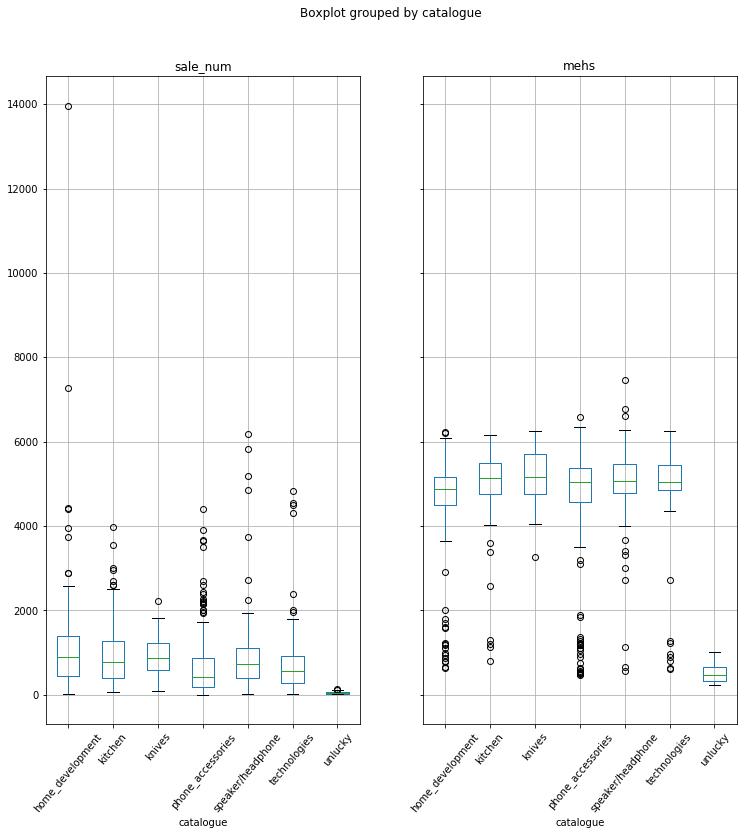

In [45]:
boxplot = catalogued_data.boxplot(column = ['sale_num','mehs'],by='catalogue', rot=50,fontsize=10,figsize=(12,12))

In [46]:
catalogued_data['meh_sale_ratio'] = catalogued_data['sale_num']/catalogued_data['mehs']

/Users/boyueshen/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


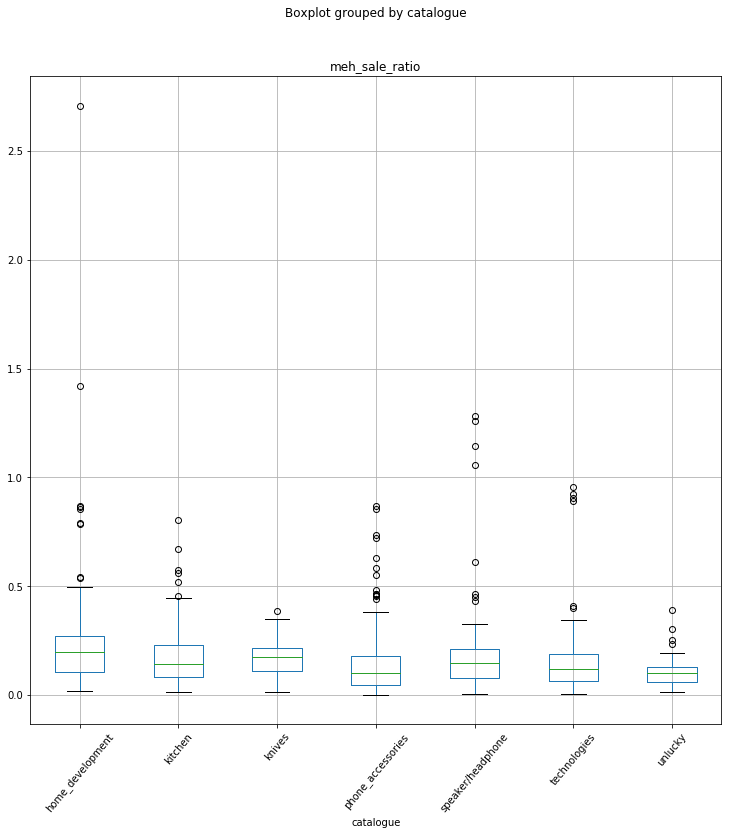

In [47]:
boxplot = catalogued_data.boxplot(column = ['meh_sale_ratio'],by='catalogue', rot=50,fontsize=10,figsize=(12,12))

In [48]:
new_data = pd.read_pickle('clustered_data.pkl')

In [50]:
def catalogue(row):
    if row['first_layer_label']==1:
        cata = 'unlucky'
    elif row['first_layer_label']==2:
        cata = 'knives'
    elif (row['first_layer_label']==3) or (row['first_layer_label']==4):
        cata = 'audio'
    elif row['second_layer_label']==0.0:
        cata = 'tech/smart'
    elif row['second_layer_label']==1.0:
        cata = 'power/light'
    elif row['second_layer_label']==2.0:
        cata = 'camera/drone'
    elif (row['third_layer_label']==1.0) or (row['third_layer_label']==3.0):
        cata = 'kitchen'
    else:
        cata = 'not_identified'
    return cata
new_data['catalogue'] = new_data.apply(catalogue, axis=1)

In [54]:
new_data.to_pickle('./catalogued_data.pkl')

In [79]:
catalogued_data = new_data[(new_data['catalogue'] != 'not_identified') & (new_data['visits']!=144286)]
catalogued_data = catalogued_data[catalogued_data['visits']!=120298]
catalogued_data = catalogued_data[catalogued_data['visits']!=114526]
catalogued_data = catalogued_data[catalogued_data['catalogue']!='unlucky']

In [96]:
catalogued_data['meh_sale_ratio'] = catalogued_data['sale_num']/catalogued_data['mehs']

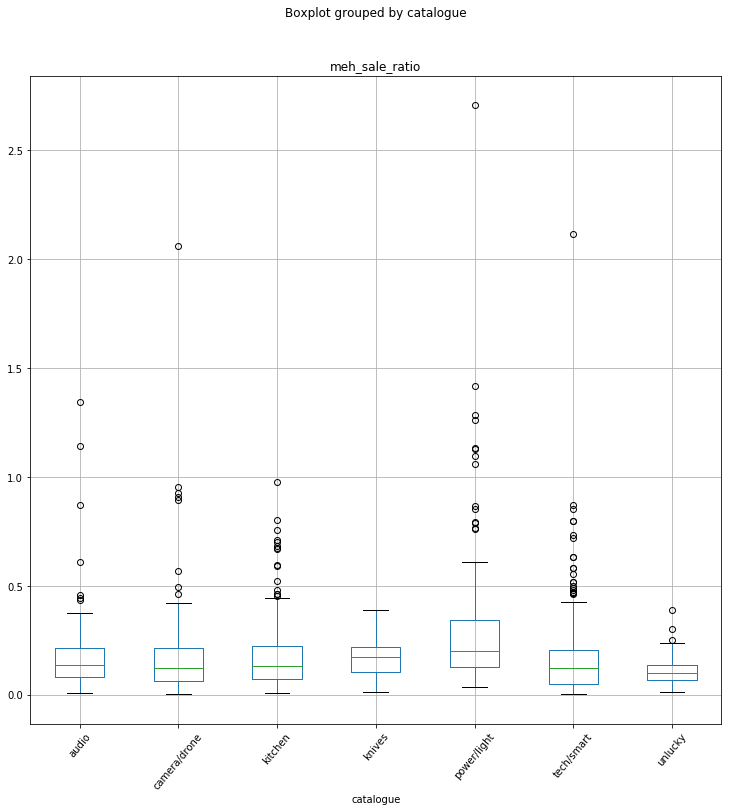

In [97]:
boxplot = catalogued_data.boxplot(column = ['meh_sale_ratio'],by='catalogue', rot=50,fontsize=10,figsize=(12,12))

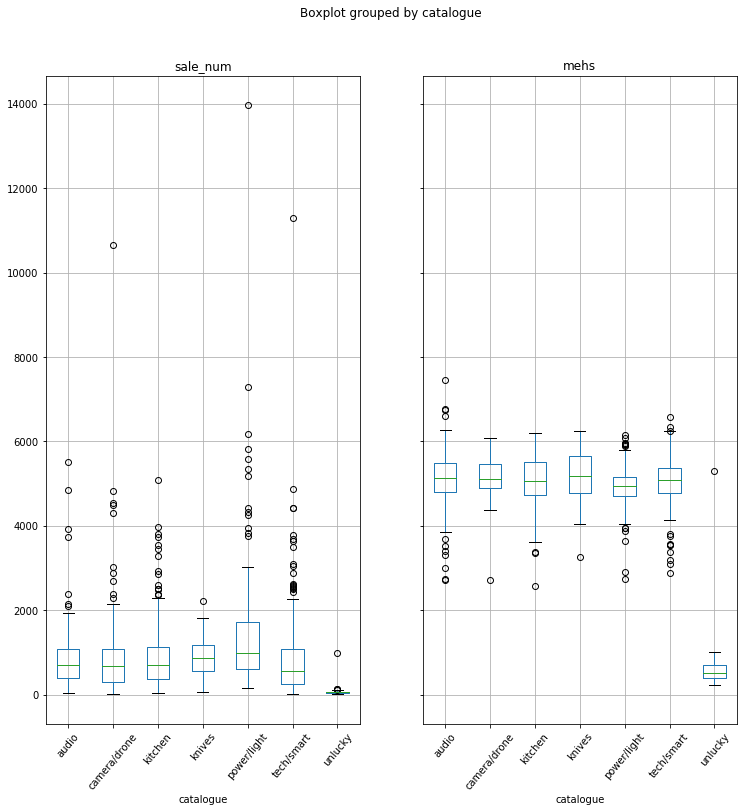

In [98]:
boxplot = catalogued_data.boxplot(column = ['sale_num','mehs'],by='catalogue', rot=50,fontsize=10,figsize=(12,12))

In [99]:
audio = catalogued_data[catalogued_data['catalogue']=='audio']
camera_drone = catalogued_data[catalogued_data['catalogue']=='camera/drone']
kitchen = catalogued_data[catalogued_data['catalogue']=='kitchen']
knives = catalogued_data[catalogued_data['catalogue']=='knives']
tech = catalogued_data[catalogued_data['catalogue']=='tech/smart']
power_light = catalogued_data[catalogued_data['catalogue']=='power/light']

In [100]:
audio.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,0.0,0.0,181.000000
mean,5124.375691,1062.845304,849.635359,22487.254144,54955.535912,36.081814,-0.016411,3.613260,NaN,NaN,0.168107
std,677.803366,275.667288,731.129522,20921.210515,23135.425744,52.015754,0.807808,0.488354,NaN,NaN,0.159358
min,2714.000000,358.000000,35.000000,1806.000000,21.000000,-1.248948,-0.596160,3.000000,NaN,NaN,0.006593
25%,4803.000000,915.000000,405.000000,10451.000000,50321.000000,10.618287,-0.411861,3.000000,NaN,NaN,0.080256
50%,5123.000000,1015.000000,710.000000,16451.000000,59439.000000,18.619165,-0.287607,4.000000,NaN,NaN,0.137624
75%,5480.000000,1143.000000,1083.000000,26848.000000,67572.000000,35.470085,-0.025911,4.000000,NaN,NaN,0.213728
max,7459.000000,2917.000000,5517.000000,176514.000000,111534.000000,283.769886,3.830200,4.000000,NaN,NaN,1.343971


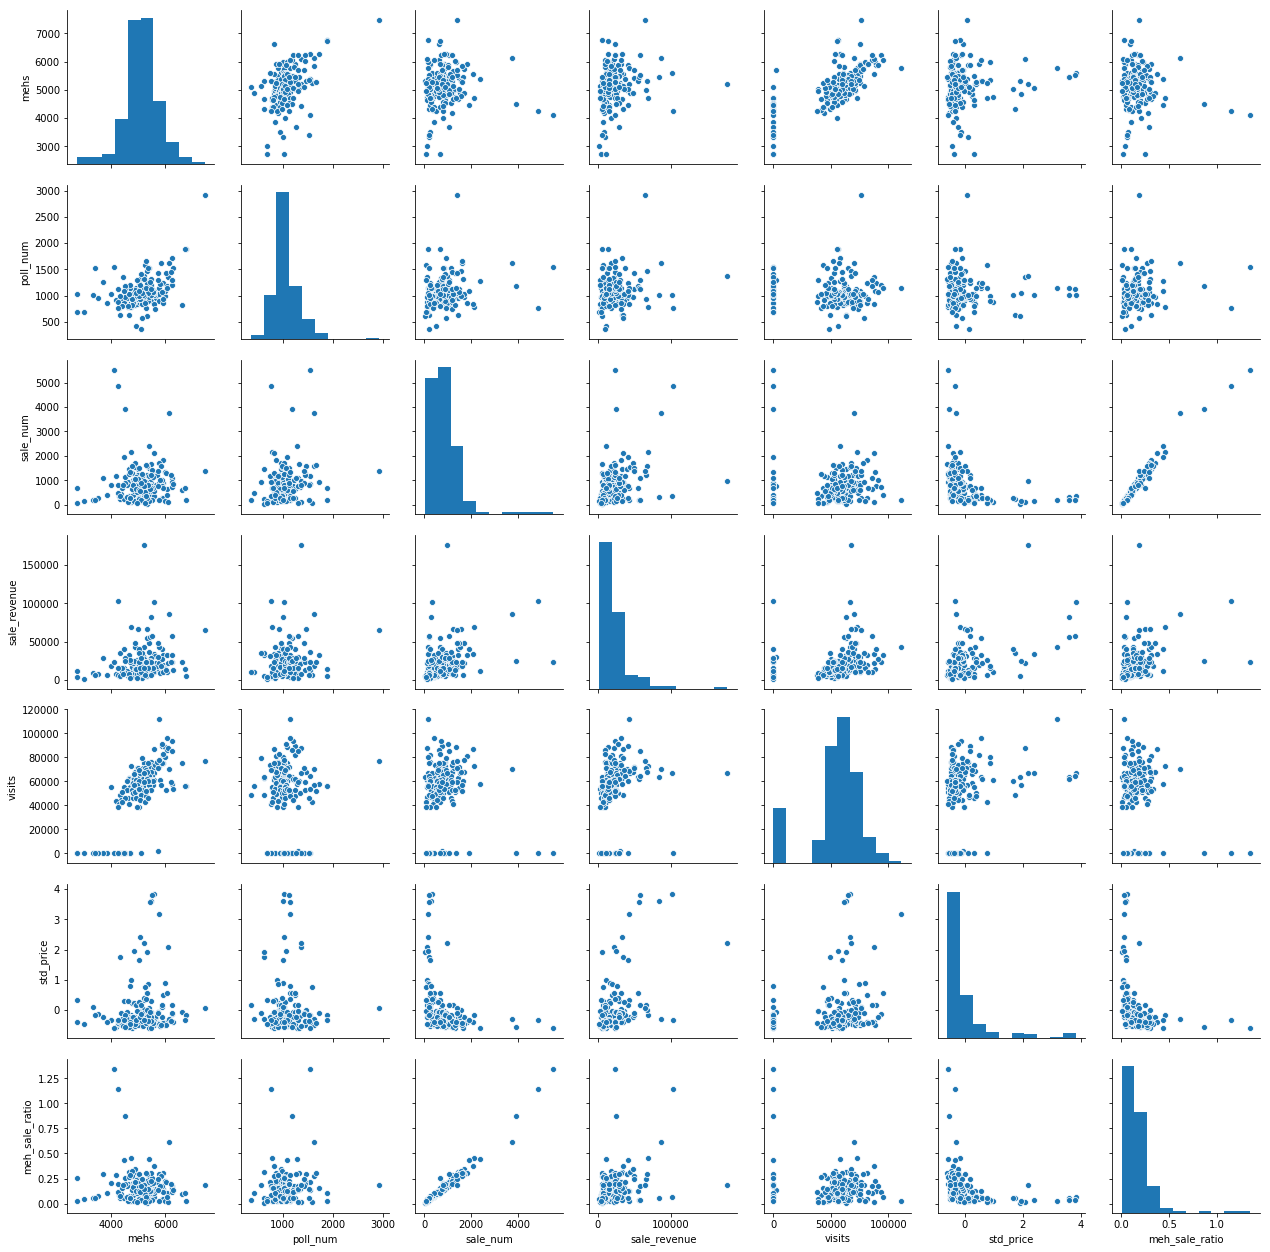

In [102]:
sns.pairplot(audio[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [103]:
camera_drone.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,0.0,85.000000
mean,5175.482353,1015.576471,1094.400000,42741.976471,64285.682353,93.783617,0.879701,0.0,2.0,NaN,0.210013
std,511.773518,244.101773,1485.445133,32988.045829,15325.701164,131.713402,2.045517,0.0,0.0,NaN,0.289175
min,2720.000000,422.000000,16.000000,1230.000000,27.000000,0.754000,-0.565054,0.0,2.0,NaN,0.005882
25%,4904.000000,862.000000,309.000000,18883.000000,57144.000000,21.135022,-0.248536,0.0,2.0,NaN,0.063087
50%,5112.000000,1004.000000,669.000000,35502.000000,64810.000000,42.044660,0.076192,0.0,2.0,NaN,0.125319
75%,5475.000000,1168.000000,1078.000000,57146.000000,71174.000000,62.213592,0.389417,0.0,2.0,NaN,0.214078
max,6084.000000,1837.000000,10643.000000,182496.000000,97367.000000,614.823529,8.971484,0.0,2.0,NaN,2.062997


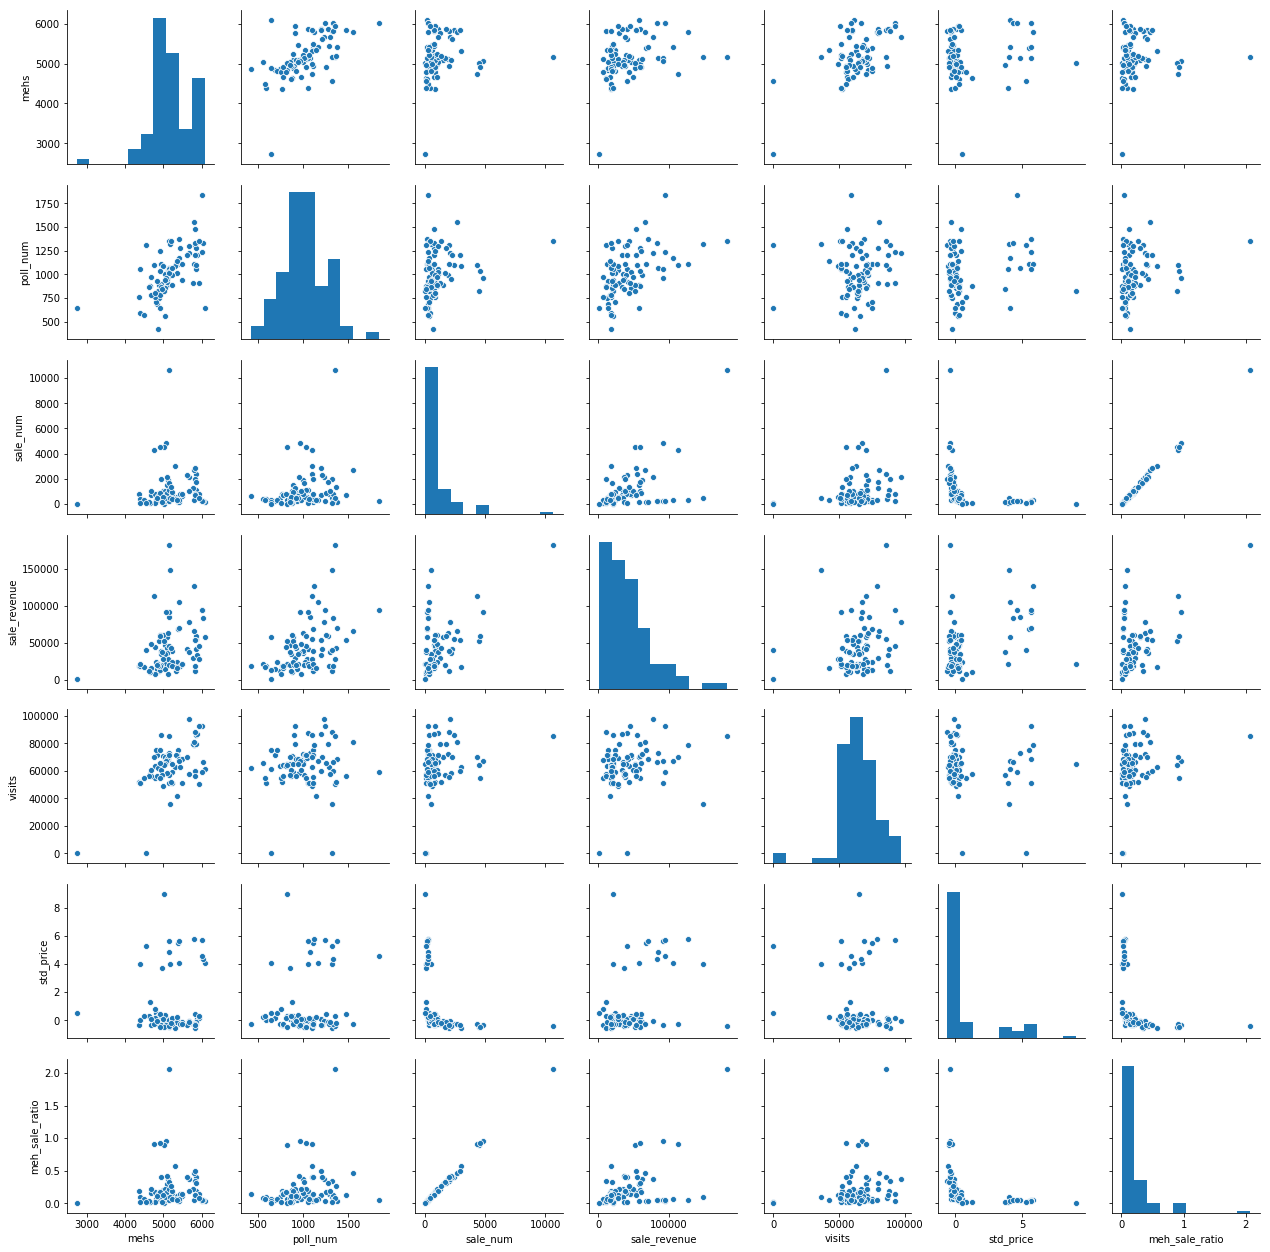

In [104]:
sns.pairplot(camera_drone[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [105]:
kitchen.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000,183.000000,183.000000
mean,5086.114754,992.743169,959.901639,19639.054645,59076.786885,29.107086,-0.124729,0.0,3.557377,2.672131,0.188823
std,577.530793,257.194040,862.376260,16411.899496,19761.129747,46.686890,0.725050,0.0,0.498060,0.742463,0.170537
min,2568.000000,326.000000,36.000000,614.000000,21.000000,-0.834054,-0.589717,0.0,3.000000,1.000000,0.007609
25%,4738.000000,830.000000,374.500000,9190.500000,51601.500000,6.780984,-0.471455,0.0,3.000000,3.000000,0.074439
50%,5056.000000,997.000000,700.000000,15041.000000,59168.000000,16.776062,-0.316231,0.0,4.000000,3.000000,0.133466
75%,5505.000000,1099.500000,1141.000000,23117.500000,67902.500000,27.602828,-0.148090,0.0,4.000000,3.000000,0.222332
max,6202.000000,1725.000000,5086.000000,113168.000000,156909.000000,421.302521,5.966090,0.0,4.000000,3.000000,0.976575


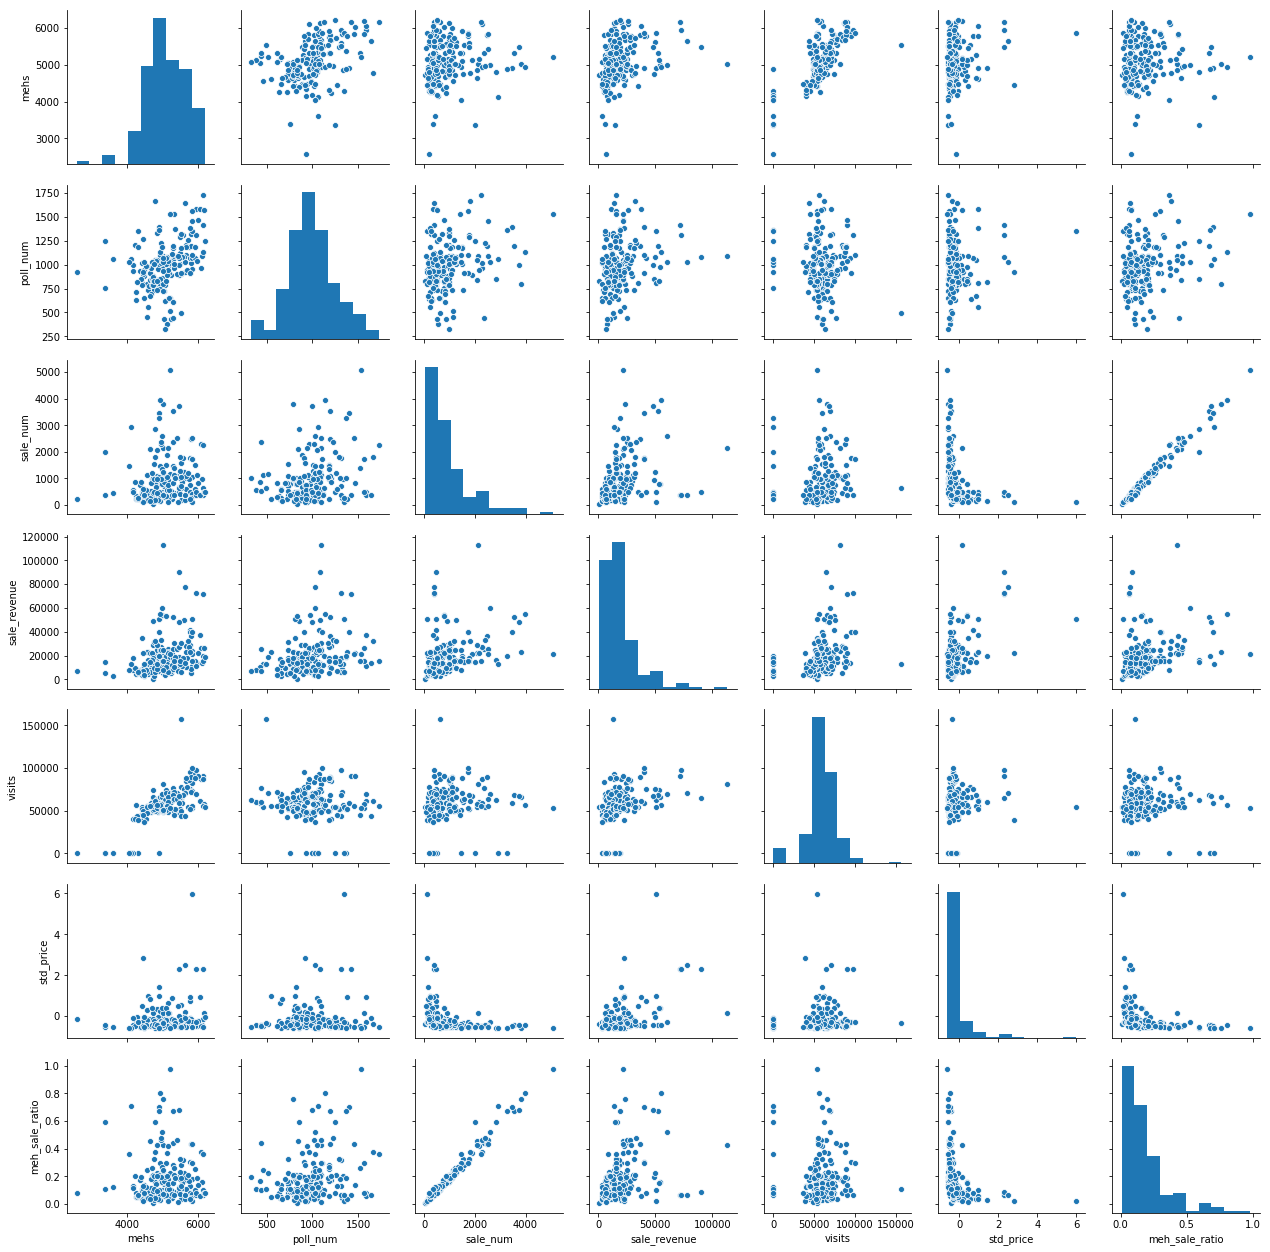

In [106]:
sns.pairplot(kitchen[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [67]:
kitchen[kitchen['sale_revenue']==113168]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label,third_layer_label,catalogue,meh_sale_ratio
311,2018-03-05 05:00:07.559,Sous vide cooks food in water at precise tempe...,Chefman Sous Vide Precision Cooker,5012,1092,2137,113168,Sous Vide or not Sous Vide\nRoasting. Baking. ...,81746,47.956481,0.168003,"[chefman, sou, vide, precision, cooker, sou, v...","[sou, vide, sou, vide, roasting, baking, fryin...",0,4.0,3.0,kitchen,0.426377


In [107]:
knives.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,0.0,0.0,52.000000
mean,5180.269231,1070.692308,873.903846,15174.884615,54680.538462,23.118928,-0.217726,2.0,NaN,NaN,0.167907
std,615.272843,253.737052,482.587115,8722.800177,21616.929707,43.723177,0.679024,0.0,NaN,NaN,0.091711
min,3266.000000,469.000000,73.000000,3097.000000,68.000000,1.617906,-0.551638,2.0,NaN,NaN,0.013740
25%,4779.500000,948.000000,554.250000,9909.000000,46975.500000,6.685214,-0.472942,2.0,NaN,NaN,0.104428
50%,5172.000000,1054.500000,880.500000,13954.500000,54819.000000,11.347495,-0.400537,2.0,NaN,NaN,0.174083
75%,5663.500000,1194.000000,1187.250000,19091.000000,63632.000000,21.040151,-0.250009,2.0,NaN,NaN,0.217978
max,6258.000000,1815.000000,2230.000000,53378.000000,108293.000000,240.136986,3.152578,2.0,NaN,NaN,0.387826


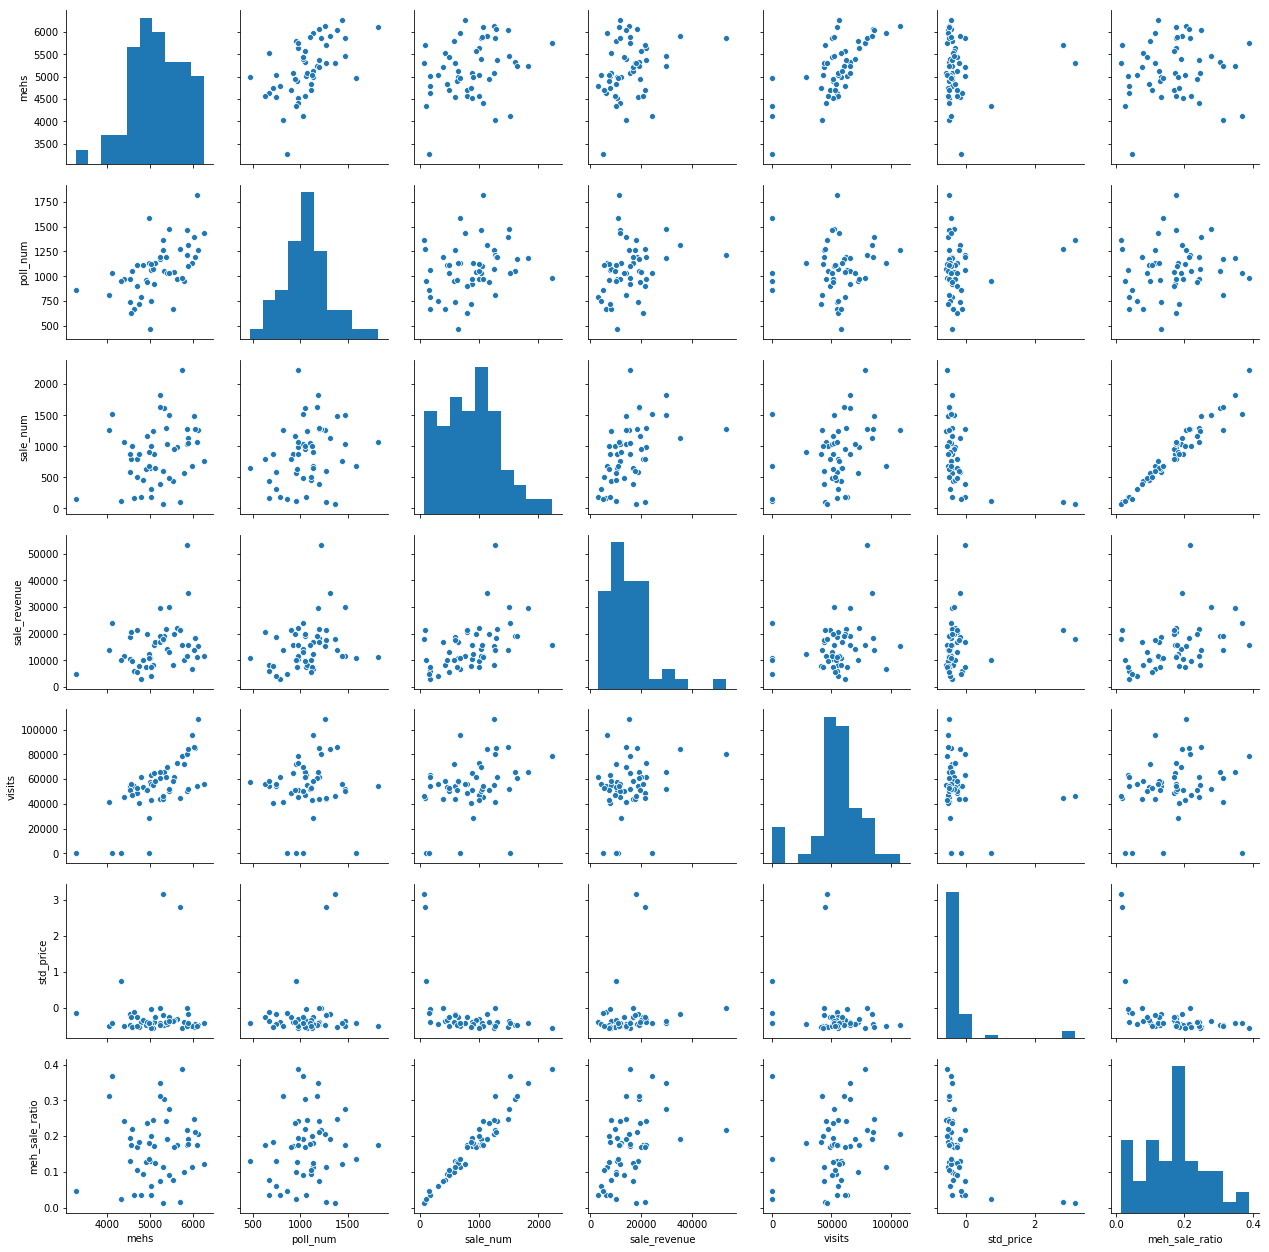

In [108]:
sns.pairplot(knives[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [109]:
tech.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.0,263.0,0.0,263.000000
mean,5075.007605,1018.182510,872.003802,25962.935361,57370.676806,58.802492,0.336442,0.0,0.0,NaN,0.171061
std,552.803742,290.441643,1053.444526,25187.343428,19321.747167,82.689244,1.284169,0.0,0.0,NaN,0.200706
min,2884.000000,0.000000,10.000000,1685.000000,25.000000,-1.702489,-0.603204,0.0,0.0,NaN,0.002627
25%,4778.500000,850.500000,259.000000,9970.500000,52034.000000,10.412455,-0.415058,0.0,0.0,NaN,0.050912
50%,5090.000000,985.000000,570.000000,17603.000000,61119.000000,24.024011,-0.203670,0.0,0.0,NaN,0.122927
75%,5365.000000,1158.500000,1079.500000,32494.000000,68721.000000,66.591880,0.457412,0.0,0.0,NaN,0.205295
max,6586.000000,1882.000000,11286.000000,165786.000000,98772.000000,505.485915,7.273464,0.0,0.0,NaN,2.114275


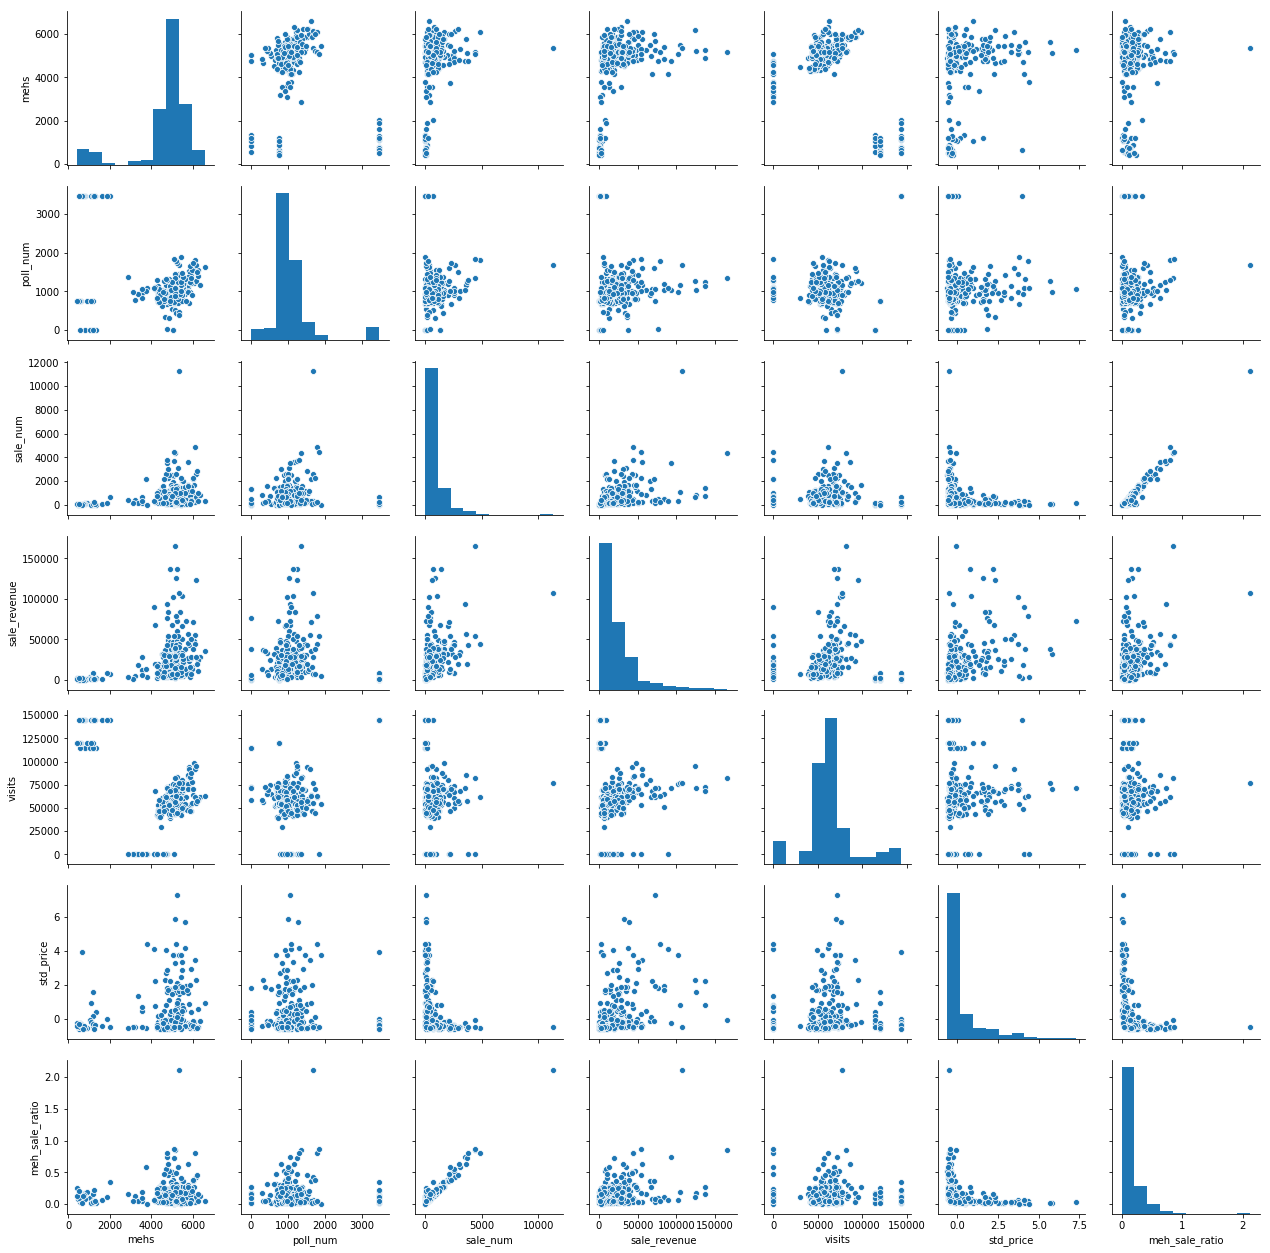

In [71]:
sns.pairplot(tech[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [72]:
power_light.describe()

,mehs,poll_num,sale_num,sale_revenue,visits,price,std_price,first_layer_label,second_layer_label,third_layer_label,meh_sale_ratio
count,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.0,160.0,0.0,160.000000
mean,4663.825000,1004.675000,1390.58125,23111.256250,63409.031250,19.762918,-0.269845,0.0,1.0,NaN,0.290395
std,1131.022421,442.552851,1616.47430,23453.075554,24551.143717,30.665112,0.476231,0.0,0.0,NaN,0.323292
min,746.000000,0.000000,20.00000,362.000000,14.000000,-0.908797,-0.590878,0.0,1.0,NaN,0.026810
25%,4607.500000,845.750000,509.75000,9394.500000,53016.750000,6.158297,-0.481125,0.0,1.0,NaN,0.119556
50%,4920.500000,958.500000,943.50000,16204.000000,61534.000000,11.434484,-0.399186,0.0,1.0,NaN,0.196049
75%,5160.000000,1128.000000,1683.00000,27784.750000,70781.500000,18.746198,-0.285634,0.0,1.0,NaN,0.326600
max,6145.000000,3456.000000,13965.00000,195109.000000,144286.000000,161.000000,1.923576,0.0,1.0,NaN,2.707445


In [75]:
power_light[power_light['visits']==144286]['item_name']

664    Readymax 10" & 12" Tongue and Groove Pliers wi...
672                 Panasonic Eneloop Battery Power Pack
707            3-Pack: LED Multi-Function Lantern Lights
Name: item_name, dtype: object

In [101]:
new_data[new_data['visits']==111534]

,datetime,item_features,item_name,mehs,poll_num,sale_num,sale_revenue,story,visits,price,std_price,descriptions,nlp_story,first_layer_label,second_layer_label,third_layer_label,catalogue
947,2016-10-10 04:00:09.160,"A good deal if you don’t use Atmos, a great de...",Onkyo 5.1.2-Channel Dolby Atmos Speaker System,5773,1143,173,42723,"A1 sound now, 3D sound later.\nNot convinced a...",111534,241.953757,3.180793,"[onkyo, channel, dolby, atmos, speaker, system...","[a1, sound, 3d, sound, later, convinced, atmos...",3,NaN,NaN,audio


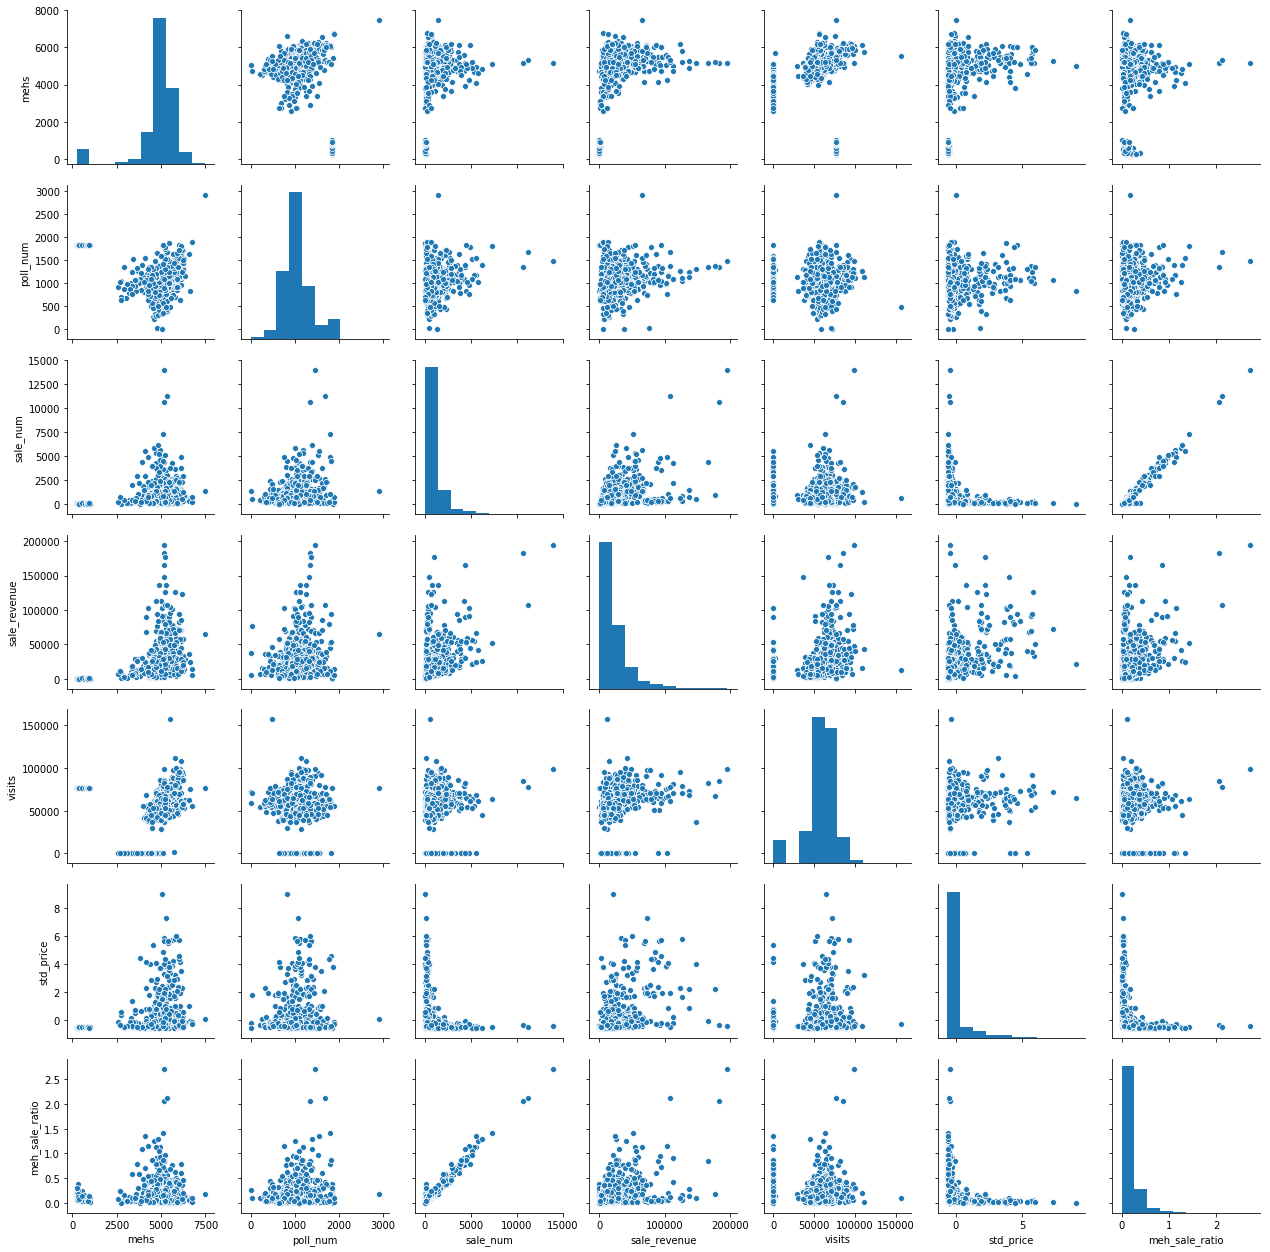

In [110]:
sns.pairplot(catalogued_data[['mehs','poll_num','sale_num','sale_revenue','visits','std_price','meh_sale_ratio']])

In [112]:
stats.f_oneway(audio['visits'],camera_drone['visits'],kitchen['visits'],knives['visits'],tech['visits'],power_light['visits'])

F_onewayResult(statistic=3.0384952287229567, pvalue=0.009978868287869614)

In [122]:
visits_compare = ols('visits ~ C(catalogue)', data=catalogued_data).fit()
visits_compare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 visits   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.038
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00998
Time:                        16:10:03   Log-Likelihood:                -10313.
No. Observations:                 912   AIC:                         2.064e+04
Df Residuals:                     906   BIC:                         2.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5.496e+04   1470.826     37.364      0.000    5.21e+04    5.78e+04
C(catalogue)[T.camera/drone]  9330.1464   2601.913      3.586      0.000    4223.669    1.44e+04
C(catalogue)[T.kitchen]       4121.2510   2074.372      1.987      0.047      50.118    8192.384
C(catalogue)[T.knives]        -274.9975   3113.420     -0.088      0.930   -6385.352    5835.357
C(catalogue)[T.power/light]   3510.6330   2192.949      1.601      0.110    -793.218    7814.484
C(catalogue)[T.tech/smart]    2415.1409   1911.063      1.264      0.207   -1335.485    6165.766
==============================================================================
Omnibus:                      205.006   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.680
Skew:                          -1.134   Prob(JB):                    5.37e-124
Kurtosis:                       6.130   Cond. No.                         6.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
mc = MultiComparison(catalogued_data['visits'], catalogued_data['catalogue'])
mc_results = mc.tukeyhsd()
print(mc_results)

        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
   group1       group2     meandiff     lower      upper    reject
------------------------------------------------------------------
   audio     camera/drone 9330.1464   1899.6068  16760.6861  True 
   audio       kitchen     4121.251   -1802.7367 10045.2387 False 
   audio        knives    -274.9975   -9166.298  8616.3031  False 
   audio     power/light   3510.633   -2751.9875 9773.2535  False 
   audio      tech/smart  2415.1409   -3042.4705 7872.7523  False 
camera/drone   kitchen    -5208.8955 -12626.4488 2208.6579  False 
camera/drone    knives    -9605.1439 -19554.0982  343.8104  False 
camera/drone power/light  -5819.5134 -13510.2145 1871.1876  False 
camera/drone  tech/smart  -6915.0055 -13965.6786  135.6675  False 
  kitchen       knives    -4396.2484  -13276.699 4484.2022  False 
  kitchen    power/light   -610.618   -6857.8248 5636.5888  False 
  kitchen     tech/smart  -1706.1101  -7146.0274 3733.8072  Fa

In [124]:
poll_compare = ols('poll_num ~ C(catalogue)', data=catalogued_data).fit()
poll_compare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               poll_num   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.043
Date:                Mon, 26 Nov 2018   Prob (F-statistic):             0.0704
Time:                        16:10:17   Log-Likelihood:                -6388.3
No. Observations:                 912   AIC:                         1.279e+04
Df Residuals:                     906   BIC:                         1.282e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1062.8453     19.883     53.454      0.000    1023.823    1101.868
C(catalogue)[T.camera/drone]   -47.2688     35.174     -1.344      0.179    -116.300      21.763
C(catalogue)[T.kitchen]        -70.1021     28.042     -2.500      0.013    -125.137     -15.067
C(catalogue)[T.knives]           7.8470     42.089      0.186      0.852     -74.755      90.449
C(catalogue)[T.power/light]    -72.1021     29.645     -2.432      0.015    -130.283     -13.921
C(catalogue)[T.tech/smart]     -44.6628     25.835     -1.729      0.084     -95.365       6.040
==============================================================================
Omnibus:                      122.378   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.152
Skew:                           0.563   Prob(JB):                    7.47e-111
Kurtosis:                       6.475   Cond. No.                         6.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
mc = MultiComparison(catalogued_data['poll_num'], catalogued_data['catalogue'])
mc_results = mc.tukeyhsd()
print(mc_results)

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
   group1       group2    meandiff   lower    upper   reject
------------------------------------------------------------
   audio     camera/drone -47.2688 -147.7181 53.1804  False 
   audio       kitchen    -70.1021 -150.1852  9.9809  False 
   audio        knives     7.847   -112.3494 128.0434 False 
   audio     power/light  -72.1021 -156.7629 12.5587  False 
   audio      tech/smart  -44.6628 -118.4411 29.1155  False 
camera/drone   kitchen    -22.8333  -123.107 77.4404  False 
camera/drone    knives    55.1158   -79.3784 189.6101 False 
camera/drone power/light  -24.8332 -128.7994  79.133  False 
camera/drone  tech/smart   2.606    -92.708  97.9201  False 
  kitchen       knives    77.9491   -42.1006 197.9989 False 
  kitchen    power/light  -1.9999   -86.4524 82.4525  False 
  kitchen     tech/smart  25.4393   -48.0998 98.9785  False 
   knives    power/light  -79.9491 -203.0998 43.2017  False 
   knives     tech/smart

In [126]:
meh_compare = ols('mehs ~ C(catalogue)', data=catalogued_data).fit()
meh_compare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mehs   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.462
Date:                Mon, 26 Nov 2018   Prob (F-statistic):             0.0316
Time:                        16:11:54   Log-Likelihood:                -7094.2
No. Observations:                 912   AIC:                         1.420e+04
Df Residuals:                     906   BIC:                         1.423e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     5124.3757     43.112    118.861      0.000    5039.764    5208.988
C(catalogue)[T.camera/drone]    51.1067     76.267      0.670      0.503     -98.573     200.786
C(catalogue)[T.kitchen]        -38.2609     60.803     -0.629      0.529    -157.593      81.071
C(catalogue)[T.knives]          55.8935     91.260      0.612      0.540    -123.212     234.999
C(catalogue)[T.power/light]   -173.7743     64.279     -2.703      0.007    -299.928     -47.621
C(catalogue)[T.tech/smart]     -49.3681     56.017     -0.881      0.378    -159.305      60.569
==============================================================================
Omnibus:                       96.861   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.515
Skew:                          -0.578   Prob(JB):                     1.32e-53
Kurtosis:                       5.252   Cond. No.                         6.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
mc = MultiComparison(catalogued_data['mehs'], catalogued_data['catalogue'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
   group1       group2     meandiff   lower    upper   reject
-------------------------------------------------------------
   audio     camera/drone  51.1067  -166.6953 268.9087 False 
   audio       kitchen     -38.2609 -211.9033 135.3814 False 
   audio        knives     55.8935  -204.7259 316.513  False 
   audio     power/light  -173.7743 -357.3426  9.7939  False 
   audio      tech/smart   -49.3681 -209.3401 110.604  False 
camera/drone   kitchen     -89.3676 -306.7889 128.0537 False 
camera/drone    knives      4.7869  -286.8342 296.408  False 
camera/drone power/light   -224.881 -450.3088  0.5468  False 
camera/drone  tech/smart  -100.4747 -307.1422 106.1927 False 
  kitchen       knives     94.1545  -166.1469 354.4559 False 
  kitchen    power/light  -135.5134 -318.6299 47.6031  False 
  kitchen     tech/smart   -11.1071 -170.5606 148.3463 False 
   knives    power/light  -229.6679 -496.6931 37.3573  False 
   knive

In [133]:
catalogued_data['log_ratio'] = np.log(catalogued_data['meh_sale_ratio'])

/Users/boyueshen/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([  3.,   7.,  24.,  79., 150., 259., 268.,  87.,  31.,   4.]),
 array([-5.94174895, -5.24797353, -4.55419811, -3.86042268, -3.16664726,
        -2.47287183, -1.77909641, -1.08532098, -0.39154556,  0.30222987,
         0.99600529]),
 <a list of 10 Patch objects>)

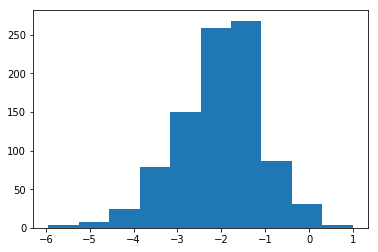

In [135]:
plt.hist(catalogued_data['log_ratio'])

In [136]:
ratio_compare = ols('log_ratio ~ C(catalogue)', data=catalogued_data).fit()
ratio_compare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_ratio   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     11.88
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           3.76e-11
Time:                        16:38:33   Log-Likelihood:                -1216.4
No. Observations:                 912   AIC:                             2445.
Df Residuals:                     906   BIC:                             2474.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.0895      0.068    -30.511      0.000      -2.224      -1.955
C(catalogue)[T.camera/drone]    -0.0435      0.121     -0.359      0.720      -0.281       0.194
C(catalogue)[T.kitchen]          0.0728      0.097      0.754      0.451      -0.117       0.262
C(catalogue)[T.knives]           0.0917      0.145      0.632      0.527      -0.193       0.376
C(catalogue)[T.power/light]      0.5468      0.102      5.356      0.000       0.346       0.747
C(catalogue)[T.tech/smart]      -0.1683      0.089     -1.892      0.059      -0.343       0.006
==============================================================================
Omnibus:                       25.249   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.564
Skew:                          -0.304   Prob(JB):                     8.49e-08
Kurtosis:                       3.699   Cond. No.                         6.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
mc = MultiComparison(catalogued_data['log_ratio'], catalogued_data['catalogue'])
mc_results = mc.tukeyhsd()
print(mc_results)

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
   audio     camera/drone -0.0435  -0.3895  0.3025 False 
   audio       kitchen     0.0728   -0.203  0.3486 False 
   audio        knives     0.0917  -0.3223  0.5056 False 
   audio     power/light   0.5468   0.2552  0.8384  True 
   audio      tech/smart  -0.1683  -0.4224  0.0858 False 
camera/drone   kitchen     0.1163  -0.2291  0.4616 False 
camera/drone    knives     0.1351  -0.3281  0.5984 False 
camera/drone power/light   0.5903   0.2322  0.9484  True 
camera/drone  tech/smart  -0.1248  -0.4531  0.2035 False 
  kitchen       knives     0.0189  -0.3946  0.4324 False 
  kitchen    power/light   0.4741   0.1832  0.7649  True 
  kitchen     tech/smart  -0.2411  -0.4944  0.0122 False 
   knives    power/light   0.4552   0.031   0.8793  True 
   knives     tech/smart   -0.26   -0.6593  0.1393 False 
power/light   